# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 17.09.2019

Мягкий дедлайн: 23:59MSK 29.09.2019 (за каждый день просрочки снимается 2 балла)

Жесткий дедлайн: 23:59MSK 02.10.2019

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а также привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Чтобы ее установить так, чтобы она работала, нужно совершить 2 простых шага:

In [37]:
%%bash
pip3 install ipyleaflet
jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: OK


После этого перезапустите сессию (не `Restart Kernel`, а нажмите `Ctrl+C` в терминале, где вы запускали ноутбук, и запустите заново). Лучше это сделать сразу, чтобы потом не пришлось прерывать сессию и терять промежуточные результаты работы. Если все сделано правильно, вы должны увидеть карту Москвы, выполнив ячейку ниже:

In [38]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
dataframe = pd.read_csv('train.csv')

In [41]:
dataframe.sample(5, random_state=1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1457636,id0880738,2,2016-02-27 20:13:05,2016-02-27 20:24:37,1,-73.981728,40.749500,-73.945915,40.792061,N,692
615369,id2002545,2,2016-06-04 09:54:05,2016-06-04 10:10:35,1,-73.979088,40.771606,-73.946518,40.822655,N,990
491096,id0289724,2,2016-05-06 17:40:05,2016-05-06 17:50:52,1,-73.989700,40.738651,-73.997772,40.754051,N,647
82632,id3767649,2,2016-05-30 19:20:26,2016-05-30 19:25:04,1,-73.988441,40.723267,-73.995880,40.716717,N,278
71403,id2530846,2,2016-01-19 14:19:22,2016-01-19 14:34:03,2,-73.985733,40.752598,-73.969231,40.755997,N,881


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [42]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
dataframe.drop('dropoff_datetime', axis=1, inplace=True)

In [43]:
dataframe['pickup_datetime'] = pd.to_datetime(dataframe['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Разбейте выборку на обучающую и тестовую в отношении 7:3.

In [44]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

y = dataframe["trip_duration"]
X = dataframe.drop(columns=["trip_duration"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


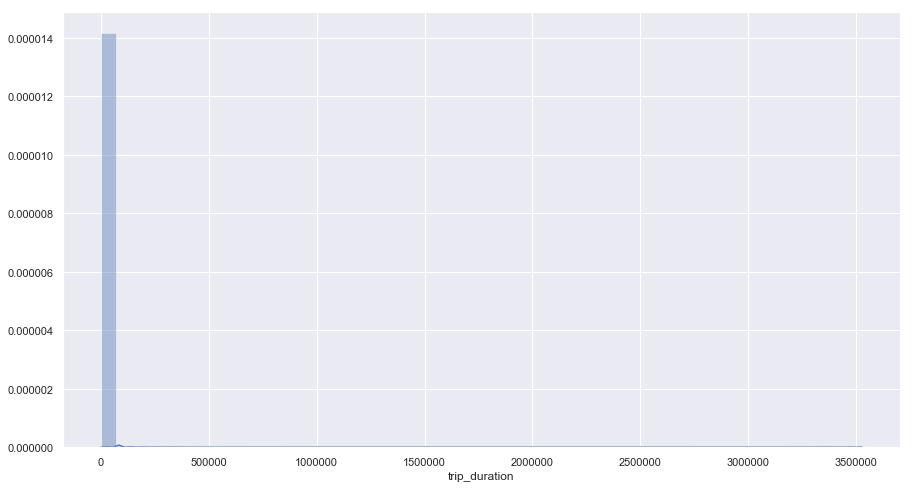

In [45]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.set(rc={'figure.figsize': (15, 8)})
sns.distplot(y_train, bins=50)

Как видим, гистограмма получилась не особо информативная. Построим гистограмму для поездок длительности < 10000.

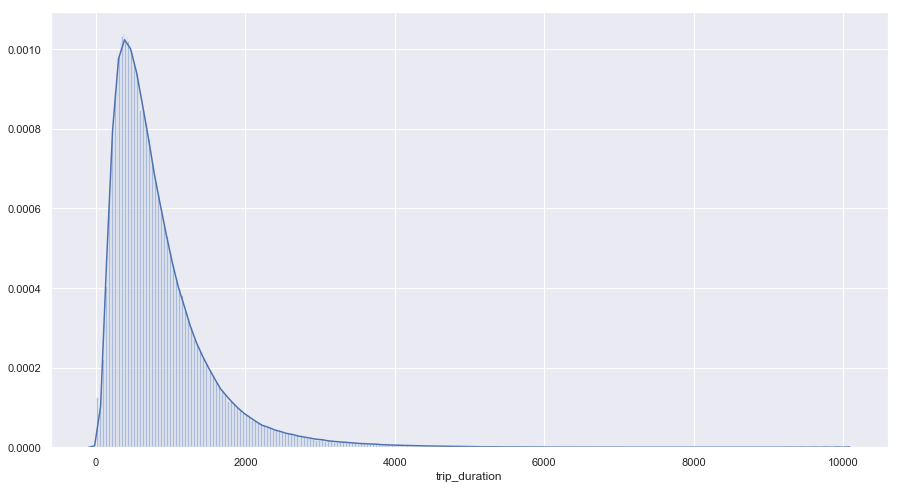

In [46]:
sns.distplot(y_train[y_train < 10000], bins=500)

Разброс значений:

In [47]:
y_min, y_max = min(y_train), max(y_train)
y_min, y_max

(1, 3526282)

Вычислим 0.5, 0.75, 0.9, 0.95, 0.99 - квантили.

In [48]:
y_train.quantile([.5, .75, .9, .95, .99])

0.50     662.0
0.75    1075.0
0.90    1634.0
0.95    2104.0
0.99    3440.0
Name: trip_duration, dtype: float64

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Сначала отметим, что разброс значения целевой переменной очень большой: от 1 и до 3526282, как видно выше, однако, целевая переменная быстро убывает, и 99% значений заключены в [0, 3440], а 95% в [0, 2104]

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Как мы видели выше, целевая функция может принимать достаточно большие значения, но число точек, в которых это происходит, мало. Кроме того, интуитивно казадлсь бы, что ошибка предсказания 10 для целевого значения 15 должна учитываться жесче, чем ошибка предсказания 10000 для целевого значения 10005. Поэтому RMSLE подходит лучше, чем RMSE.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
$$\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} =  \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat y - \hat a\big)^2}$$

Минимизация последнего эквивадентна минимизации MSE.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашим выборкам колонки `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке:

In [49]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
dataframe['log_trip_duration'] = np.log1p(dataframe['trip_duration'])
y = dataframe["log_trip_duration"]
X = dataframe.drop(columns=["log_trip_duration", 'trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

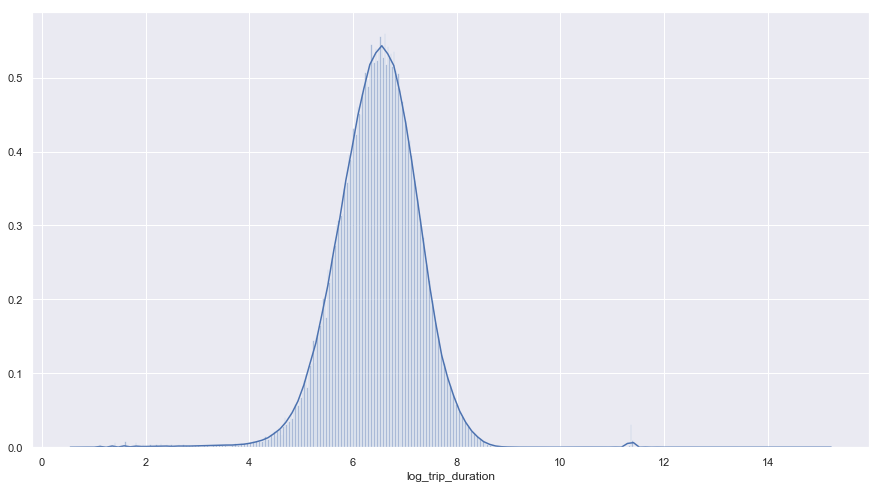

In [50]:
sns.distplot(y_train, bins=500)

In [51]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [52]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
a_log_best = sum(y_test) / len(y_test)

metric = rmse(y_test, a_log_best)
print('Значение метрики, при наилучшем константном предсказании:', metric)

Значение метрики, при наилучшем константном предсказании: 0.7942881364132969


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [53]:
dataframe['pickup_date'] = dataframe['pickup_datetime'].dt.date

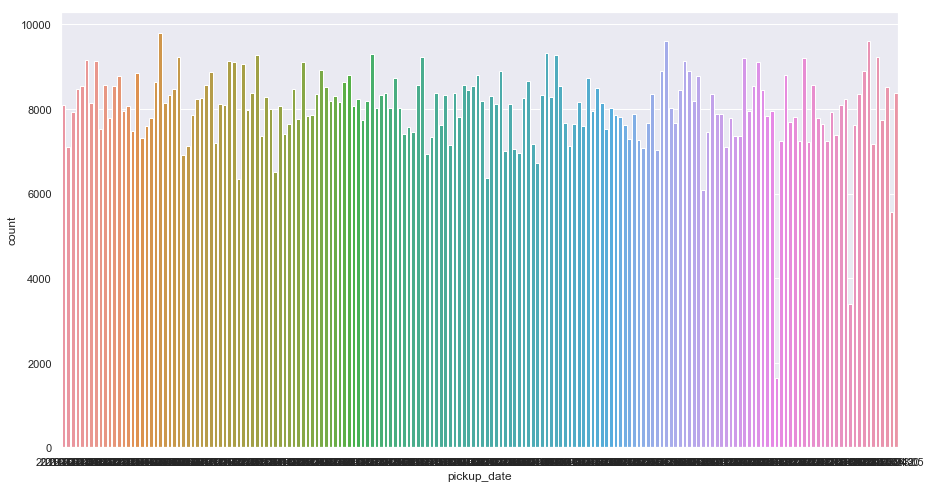

In [54]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.countplot(x='pickup_date', data=dataframe)

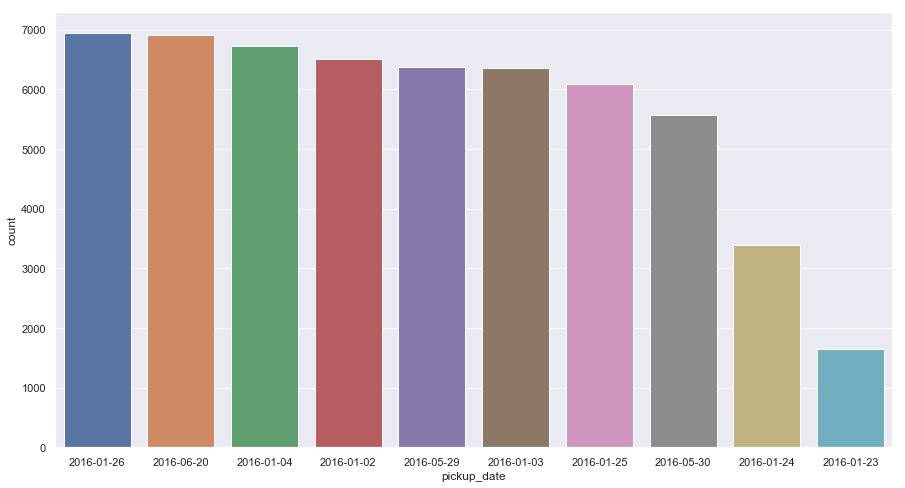

In [55]:
sns.countplot(x='pickup_date', data=dataframe, order=dataframe.pickup_date.value_counts().iloc[-10:].index)

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

Из второго графика видим, что это 2016-01-23 и 2016-01-24. В это время в Нью-Йорке была сильная метель.
2016-05-30: Computer failure causes delays at New York's John F. Kennedy Airport

In [56]:
dataframe['weekday'] = dataframe['pickup_datetime'].dt.weekday_name
dataframe['hour'] = dataframe['pickup_datetime'].dt.hour

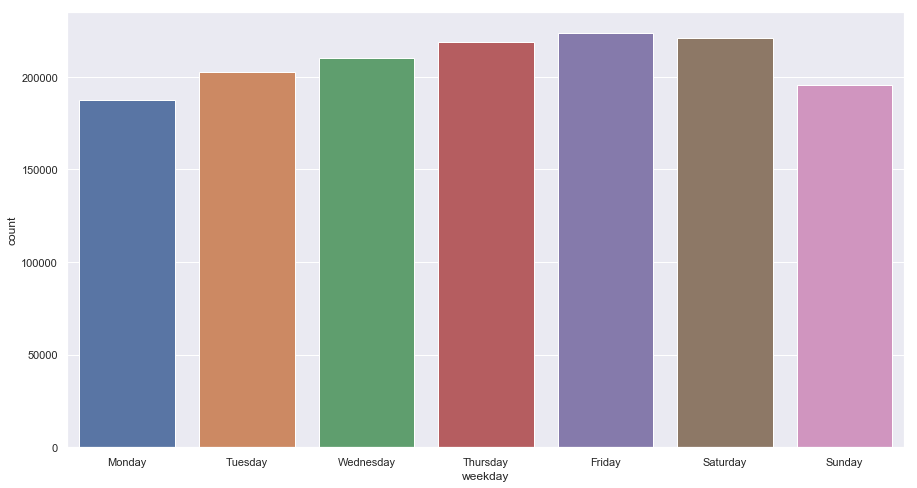

In [57]:
import calendar
sns.countplot(x='weekday', data=dataframe, order=list(calendar.day_name))

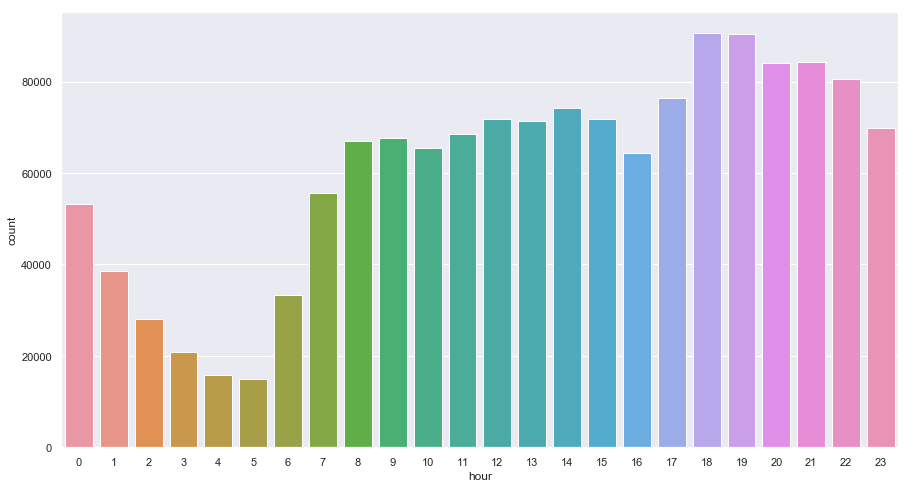

In [58]:
sns.countplot(x='hour', data=dataframe)

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [59]:
dataframe['month'] = dataframe['pickup_datetime'].dt.month

In [60]:
hour_stats_month = pd.DataFrame(dataframe.groupby(['month', 'hour']).size()).reset_index()
hour_stats_month.columns = ['month', 'hour', 'trip_count']

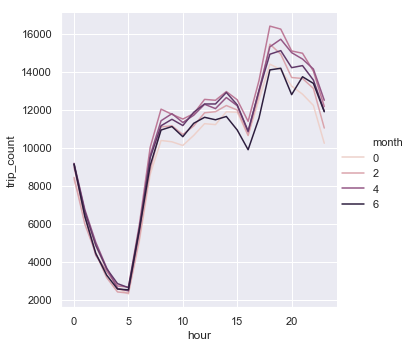

In [61]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.relplot(x='hour', hue='month', y='trip_count', data=hour_stats_month, kind='line')

In [62]:
hour_stats_weekdays = pd.DataFrame(dataframe.groupby(['weekday', 'hour']).size()).reset_index()
hour_stats_weekdays.columns = ['weekday', 'hour', 'trip_count']

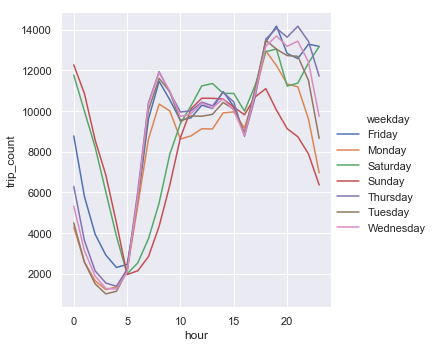

In [63]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.relplot(x='hour', hue='weekday', y='trip_count', data=hour_stats_weekdays, kind='line')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

Видим, что графики числа поездок в зависимости от времени похожи и по дням недели, и по месяцам (по месяцам более похожи). По дням недели сильно выделяется отличие выходных от рабочих дней.

**Задание 4 (0.5 баллов)**. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [64]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train = X_train
train['log_trip_duration'] = y_train.values

mean_log_stats_weekdays = pd.DataFrame(dataframe.groupby('weekday').log_trip_duration.mean()).reset_index()
mean_log_stats_weekdays.columns = ['weekday', 'mean_log_duration']
mean_log_stats_weekdays['weekday'] = mean_log_stats_weekdays['weekday'] \
                            .astype('category', categories=list(calendar.day_name), ordered=True)
mean_log_stats_weekdays = mean_log_stats_weekdays.sort_values('weekday')

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


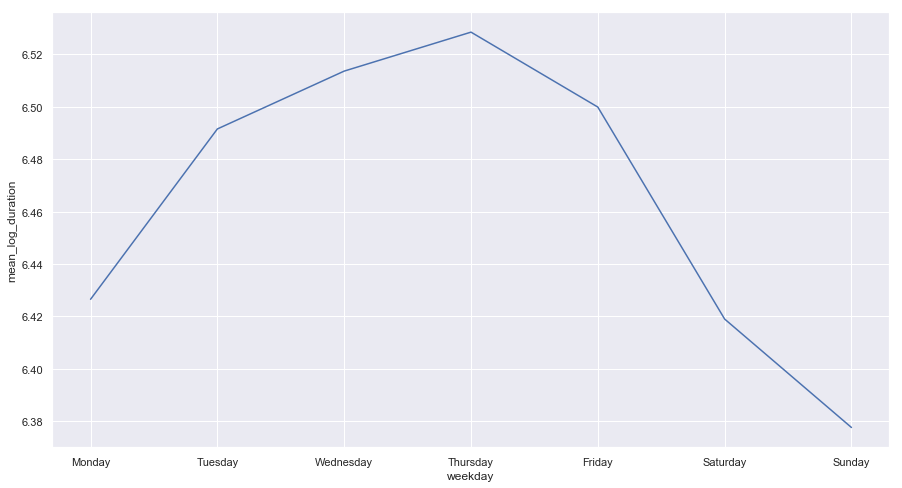

In [65]:
sns.lineplot(x='weekday', y='mean_log_duration', data=mean_log_stats_weekdays)

In [66]:
mean_log_stats_hour = pd.DataFrame(dataframe.groupby('hour').log_trip_duration.mean()).reset_index()
mean_log_stats_hour.columns = ['hour', 'mean_log_duration']

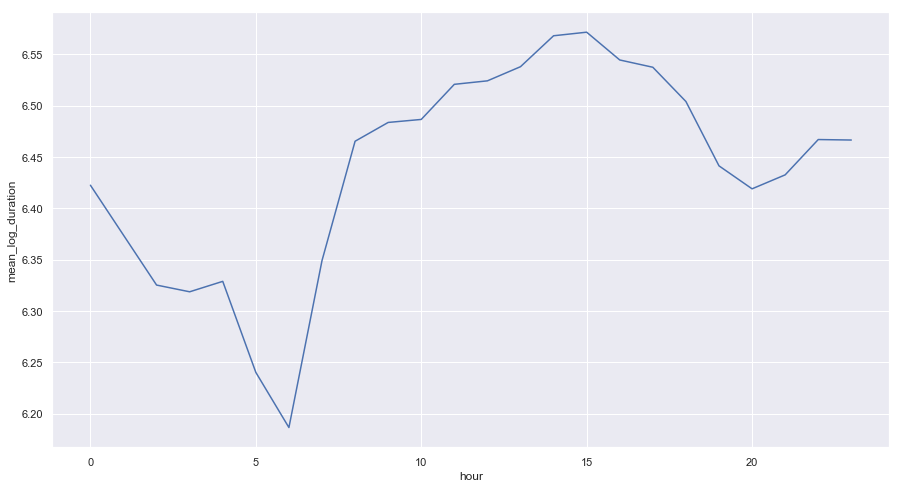

In [67]:
sns.lineplot(x='hour', y='mean_log_duration', data=mean_log_stats_hour)

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Видим, что графики, действительно, похожи. Это, вероятно, объясняется тем, что, чем больше поездок, тем больше загруженность трафика, а следовательно и время на поездку.

In [68]:
dataframe['day'] = dataframe['pickup_datetime'].dt.day
mean_log_per_anomaly_1 = dataframe[
    (dataframe.month == 1) & ((dataframe.day == 23) | (dataframe.day == 24))].log_trip_duration.mean()
mean_log_per_anomaly_2 = dataframe[
    (dataframe.month == 5) & (dataframe.day == 30)].log_trip_duration.mean()

print('Средний логарифм 23-24 января: %s, 30 мая: %s' % (mean_log_per_anomaly_1, mean_log_per_anomaly_2))

Средний логарифм 23-24 января: 6.415041385045915, 30 мая: 6.321034902098284


Как видим, в первый аномальный период логарифм имеет среднее значение относительно средних логарифмов за час/за неделю. Это можно объяснить тем, что хоть трафик и незагруженный, как мы помним, в этот период сильная метель, что замедляет и усложняет передвижение.
Во втором случае, как и ожидалось, средний логарифм получился меньше среднего.

In [69]:
dataframe['dayofyear'] = dataframe['pickup_datetime'].dt.dayofyear
mean_log_stats_dayofyear = pd.DataFrame(dataframe.groupby('dayofyear').log_trip_duration.mean()).reset_index()
mean_log_stats_dayofyear.columns = ['dayofyear', 'mean_log_duration']

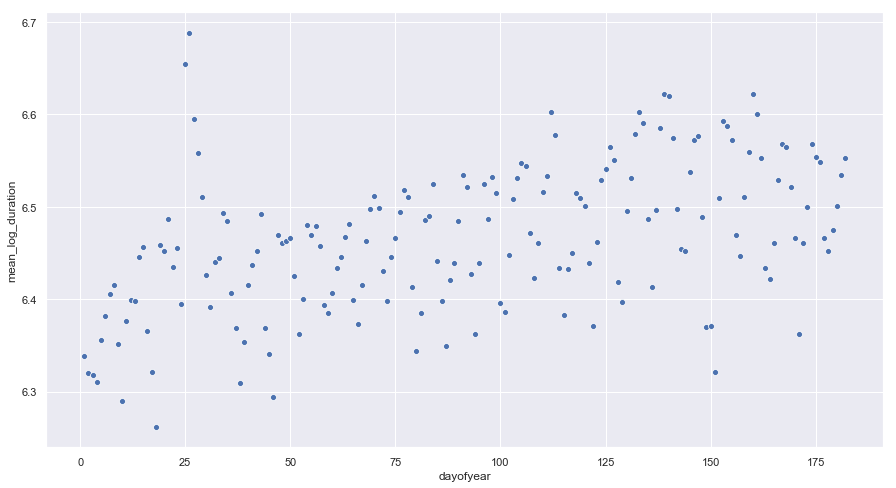

In [70]:
sns.scatterplot(x='dayofyear', y='mean_log_duration', data=mean_log_stats_dayofyear)

В зависимости времени поездок от дня в году можно наблюдать общий тренд увеличения длительности поездок. Кроме того, отметим, что длительность сильно скачет изо дня в день. Кроме того, видим сильное увеличение длительности 25-26 и чуть меньше 27 января. Что скорее всего связано с последствиями шторма, и что хочется выделить в еще один аномальный признак, что мы и сделаем позже.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [71]:
dataframe = pd.read_csv('train.csv')
dataframe.drop('dropoff_datetime', axis=1, inplace=True)
dataframe['pickup_datetime'] = pd.to_datetime(dataframe['pickup_datetime'])
dataframe['log_trip_duration'] = np.log1p(dataframe['trip_duration'])
dataframe['weekday'] = dataframe['pickup_datetime'].dt.weekday
dataframe['day'] = dataframe['pickup_datetime'].dt.day
dataframe['month'] = dataframe['pickup_datetime'].dt.month
dataframe['hour'] = dataframe['pickup_datetime'].dt.hour
dataframe['dayofyear'] = dataframe['pickup_datetime'].dt.dayofyear
dataframe['is_anomalous_1'] = (dataframe.month == 1) & ((dataframe.day == 23) | (dataframe.day == 24))
dataframe['is_anomalous_2'] = (dataframe.month == 5) & (dataframe.day == 30)
dataframe['is_anomalous_3'] = (dataframe.month == 1) & ((dataframe.day == 25) | (dataframe.day == 26))
dataframe['is_anomalous_4'] = (dataframe.month == 1) & (dataframe.day == 27)
dataframe[['is_anomalous_%d' % i for i in range(1, 5)]] = dataframe[[
    'is_anomalous_%d' % i for i in range(1, 5)]].astype(int)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

In [72]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
categorical

['id', 'store_and_fwd_flag']

In [73]:
dataframe.sample(5, random_state=3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,weekday,day,month,hour,dayofyear,is_anomalous_1,is_anomalous_2,is_anomalous_3,is_anomalous_4
296687,id2151196,2,2016-06-23 23:33:31,6,-73.961472,40.774391,-73.953712,40.775360,N,439,6.086775,3,23,6,23,175,0,0,0,0
164979,id1472996,2,2016-05-17 06:10:20,1,-73.994019,40.759121,-73.980667,40.774059,N,523,6.261492,1,17,5,6,138,0,0,0,0
489114,id2856455,1,2016-05-29 16:13:52,3,-73.962151,40.779259,-73.982208,40.770210,N,483,6.182085,6,29,5,16,150,0,0,0,0
21718,id1806727,2,2016-03-31 21:26:33,1,-73.976959,40.742729,-73.988091,40.732052,N,326,5.789960,3,31,3,21,91,0,0,0,0
686024,id1129047,1,2016-04-26 16:05:38,3,-73.864983,40.770557,-73.903168,40.746101,N,1377,7.228388,1,26,4,16,117,0,0,0,0


In [74]:
dataframe.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

Переведем store_and_fwd_flag в bool. (Для будущего удобства)

In [75]:
dataframe.store_and_fwd_flag = dataframe.store_and_fwd_flag == 'Y'

С категориальными признаками поэкспериментируем дальше.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

Выделим weekday, month, dayofyear, hour в категориальные признаки, так как, как мы видели, не наблюдается никакой линейной зависимости между ними и результатом, а скорее играет роль конкретный день.

In [76]:
ridge_dataframe = dataframe[[
    'weekday', 'month', 'hour', 'dayofyear',
    'is_anomalous_1', 'is_anomalous_2', 'is_anomalous_3', 'is_anomalous_4', 'log_trip_duration']]
ridge_dataframe.sample(5, random_state=1)

,weekday,month,hour,dayofyear,is_anomalous_1,is_anomalous_2,is_anomalous_3,is_anomalous_4,log_trip_duration
1457636,5,2,20,58,0,0,0,0,6.541030
615369,5,6,9,156,0,0,0,0,6.898715
491096,4,5,17,127,0,0,0,0,6.473891
82632,0,5,19,151,0,1,0,0,5.631212
71403,1,1,14,19,0,0,0,0,6.782192


In [77]:
y = ridge_dataframe['log_trip_duration']
X = ridge_dataframe.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [78]:
categorical_features = ['weekday', 'month', 'dayofyear', 'hour']
numeric_features = ['is_anomalous_1', 'is_anomalous_2', 'is_anomalous_3', 'is_anomalous_4']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Test RMSE = 0.7865


/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


Видим, что результат лучше, чем при наилучшей константе, но не сильно:)

Посмотрим на корреляции признаков:

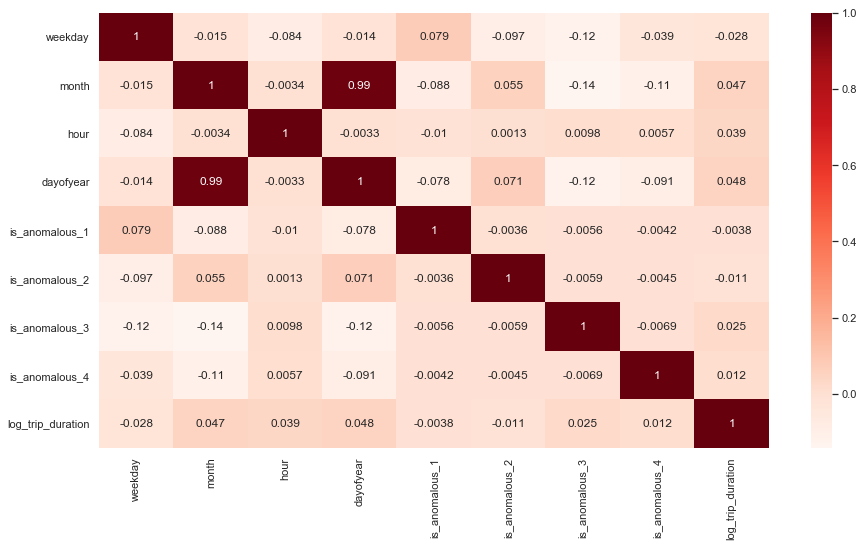

In [79]:
plt.figure(figsize=(15, 8))
cor = ridge_dataframe.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [80]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [81]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [82]:
show_circles_on_map(dataframe.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [83]:
show_circles_on_map(dataframe.sample(1000), "dropoff_latitude", "dropoff_longitude", "green")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

**Вопрос**: Какие две точки выделяются на карте?

La Guardia Airport, John Kennedy Airport

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [84]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from haversine import haversine

row_modifier = lambda p_lat, p_lon, d_lat, d_lon: haversine((p_lat, p_lon), (d_lat, d_lon))

dataframe['haversine'] = np.vectorize(row_modifier)(dataframe.pickup_latitude, dataframe.pickup_longitude, 
    dataframe.dropoff_latitude, dataframe.dropoff_longitude)

In [85]:
dataframe.sample(5, random_state=1)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,weekday,day,month,hour,dayofyear,is_anomalous_1,is_anomalous_2,is_anomalous_3,is_anomalous_4,haversine
1457636,id0880738,2,2016-02-27 20:13:05,1,-73.981728,40.749500,-73.945915,40.792061,False,692,...,5,27,2,20,58,0,0,0,0,5.611762
615369,id2002545,2,2016-06-04 09:54:05,1,-73.979088,40.771606,-73.946518,40.822655,False,990,...,5,4,6,9,156,0,0,0,0,6.303751
491096,id0289724,2,2016-05-06 17:40:05,1,-73.989700,40.738651,-73.997772,40.754051,False,647,...,4,6,5,17,127,0,0,0,0,1.842470
82632,id3767649,2,2016-05-30 19:20:26,1,-73.988441,40.723267,-73.995880,40.716717,False,278,...,0,30,5,19,151,0,1,0,0,0.960955
71403,id2530846,2,2016-01-19 14:19:22,2,-73.985733,40.752598,-73.969231,40.755997,False,881,...,1,19,1,14,19,0,0,0,0,1.440493


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [86]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
dataframe['log_haversine'] = np.log1p(dataframe['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


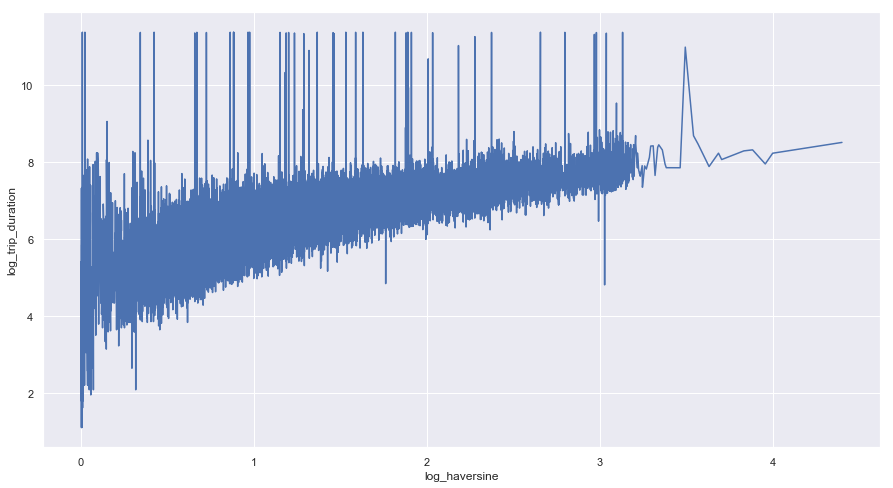

In [87]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.lineplot(x='log_haversine', y='log_trip_duration', data=dataframe.sample(30000, random_state=1))

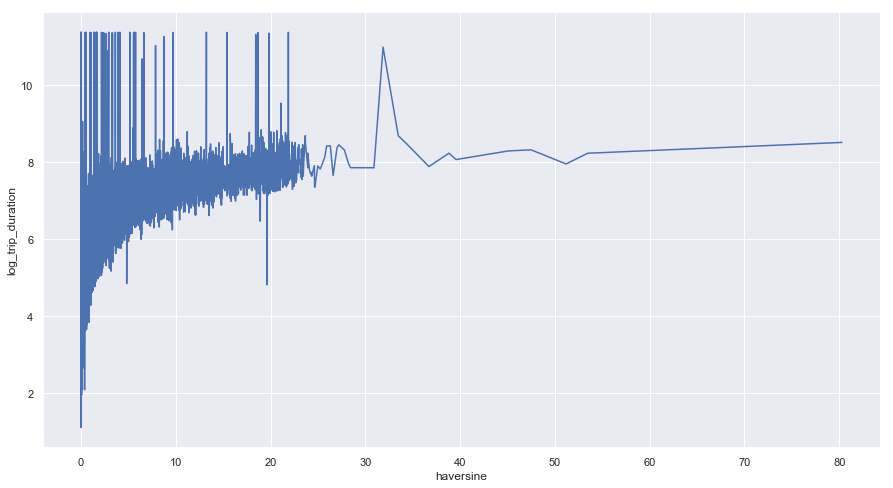

In [88]:
sns.lineplot(x='haversine', y='log_trip_duration', data=dataframe.sample(30000, random_state=1))

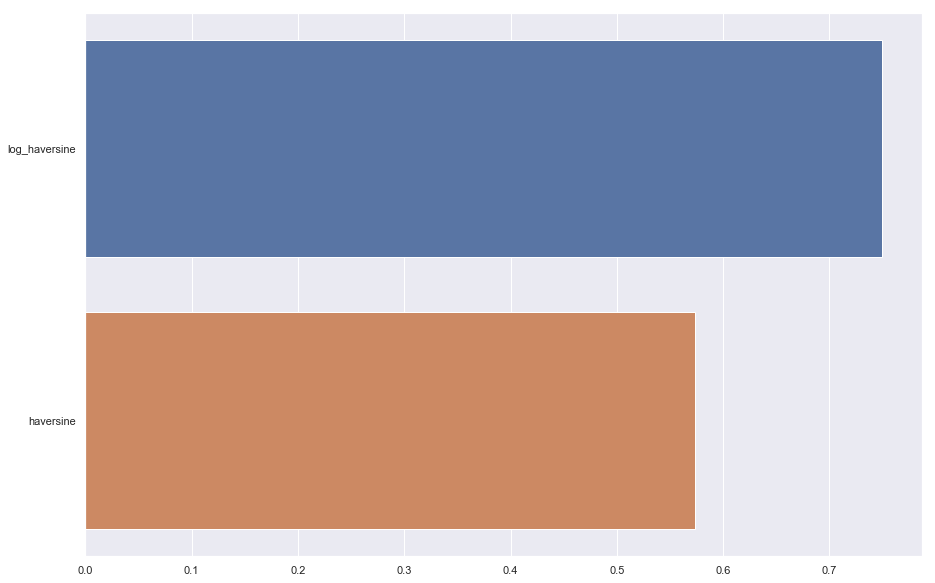

In [89]:
correlations = {
    feature: np.corrcoef(dataframe[feature], dataframe['log_trip_duration'])[0][1]
    for feature in ['haversine', 'log_haversine']
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y=features_order, x=correlations)
plot.figure.set_size_inches(15, 10)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

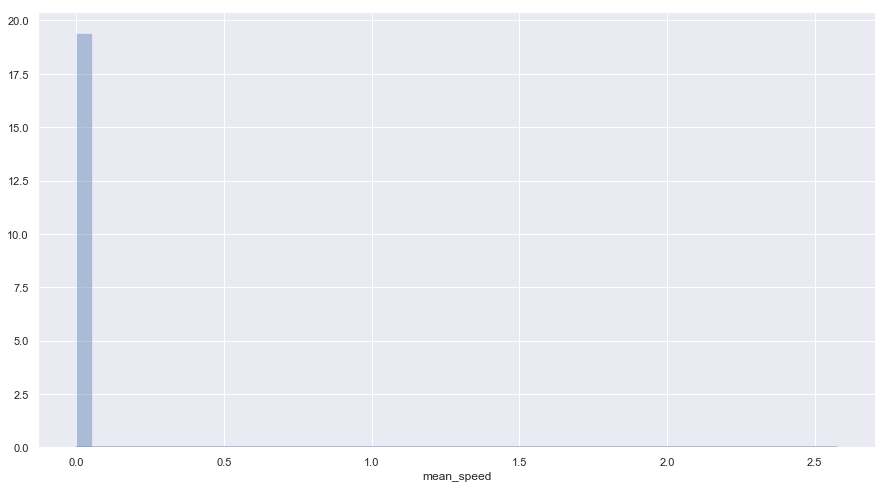

In [90]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
dataframe['mean_speed'] = dataframe['haversine'] / dataframe['trip_duration']
sns.distplot(dataframe['mean_speed'])

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

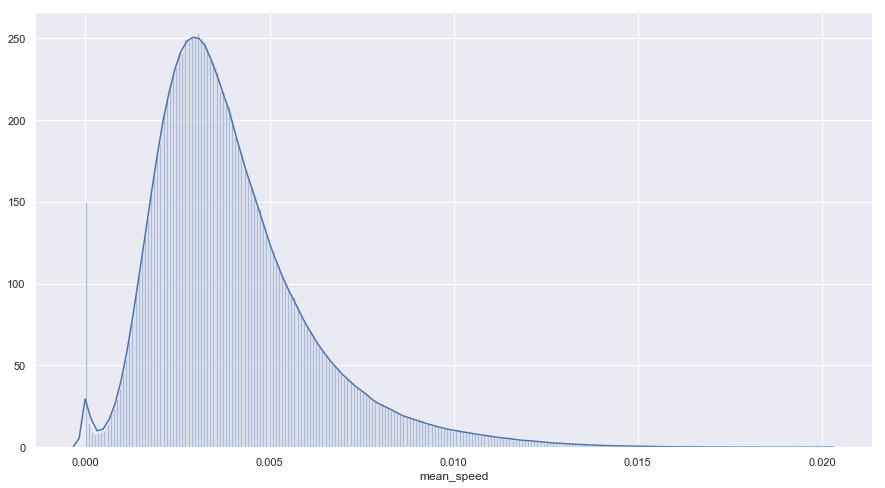

In [91]:
sns.distplot(dataframe[dataframe['mean_speed'] < 0.02].mean_speed, bins=500)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

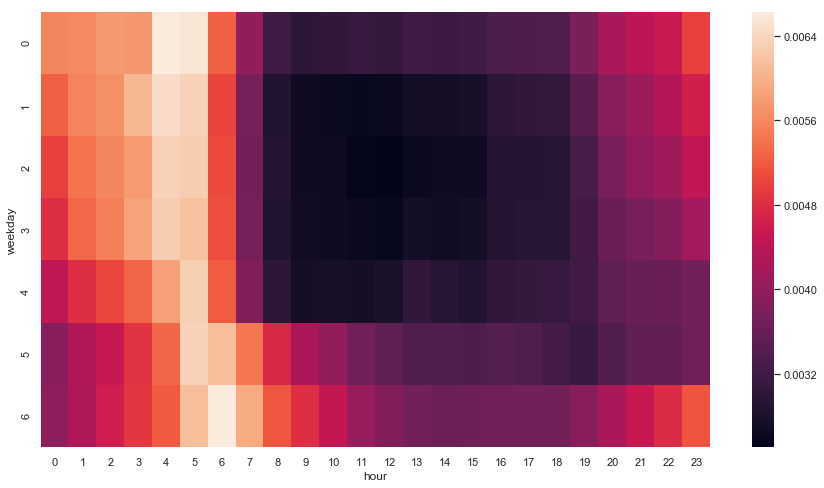

In [92]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
speed_stats = pd.DataFrame(dataframe.groupby(['weekday', 'hour']).mean_speed.median()).reset_index()
data = speed_stats.pivot(index="weekday", columns="hour", values="mean_speed")
sns.heatmap(data)
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Потому что значение скорости получено с помощью значения таргета:)

In [93]:
dataframe.drop('mean_speed', axis=1, inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [94]:
dataframe['empty_roads'] = (
      (dataframe.hour == 5)
    | ((dataframe.hour == 4) & (dataframe.weekday <= 3))
    | ((dataframe.hour == 6) & (dataframe.weekday >= 5))
    | ((dataframe.hour == 3) & ((dataframe.weekday == 1) | (dataframe.weekday == 3)))
)

In [95]:
dataframe['busy_roads'] = (
      (((dataframe.hour <= 15) & (dataframe.hour >= 9)) & ((dataframe.weekday >= 1) | (dataframe.weekday <= 3)))
    | (((dataframe.hour <= 11) & (dataframe.hour >= 9)) & (dataframe.weekday == 4))
)

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. Для каждого из аэропортов добавьте в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорту.

Для этого сначала необходимо понять, какие области считать областями аэропортов.
Найдем широту и долготу каждого из аэропортоа.

La Guardia: latitude = 40.7769, longitude = 73.8740;
John F Kennedy: latitude = 40.6413, longitude = 73.7781;

In [96]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
LA_GUARDIA_LAT = 40.7769
LA_GUARDIA_LON = -73.8740
J_KENNEDY_LAT = 40.6413
J_KENNEDY_LON = -73.7781

Добавим колонки с расстояниями до аэропортов

In [97]:
row_modifier = lambda p_lat, p_lon, d_lat, d_lon: haversine((p_lat, p_lon), (d_lat, d_lon))

dataframe['pickup_distance_from_la_guardia'] = np.vectorize(row_modifier)(dataframe.pickup_latitude, dataframe.pickup_longitude, 
    LA_GUARDIA_LAT, LA_GUARDIA_LON)
dataframe['pickup_distance_from_j_kennedy'] = np.vectorize(row_modifier)(dataframe.pickup_latitude, dataframe.pickup_longitude, 
    J_KENNEDY_LAT, J_KENNEDY_LON)
dataframe['dropoff_distance_from_la_guardia'] = np.vectorize(row_modifier)(dataframe.dropoff_latitude, dataframe.dropoff_longitude, 
    LA_GUARDIA_LAT, LA_GUARDIA_LON)
dataframe['dropoff_distance_from_j_kennedy'] = np.vectorize(row_modifier)(dataframe.dropoff_latitude, dataframe.dropoff_longitude, 
    J_KENNEDY_LAT, J_KENNEDY_LON)


In [98]:
dataframe.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,is_anomalous_3,is_anomalous_4,haversine,log_haversine,empty_roads,busy_roads,pickup_distance_from_la_guardia,pickup_distance_from_j_kennedy,dropoff_distance_from_la_guardia,dropoff_distance_from_j_kennedy
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,False,455,...,0,0,1.498523,0.915700,False,False,9.161993,22.229532,7.734718,20.935138
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,False,663,...,0,0,1.805510,1.031585,False,False,9.925179,20.197564,11.730030,21.172103
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,False,2124,...,0,0,6.385107,1.999465,False,True,8.961130,21.745026,13.327108,20.632989
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,False,429,...,0,0,1.485500,0.910474,False,False,13.092091,21.425591,14.021206,21.045366
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,False,435,...,0,0,1.188590,0.783258,False,True,8.534474,23.564439,8.352737,22.720633


поэкспериментируем с размерами областей:

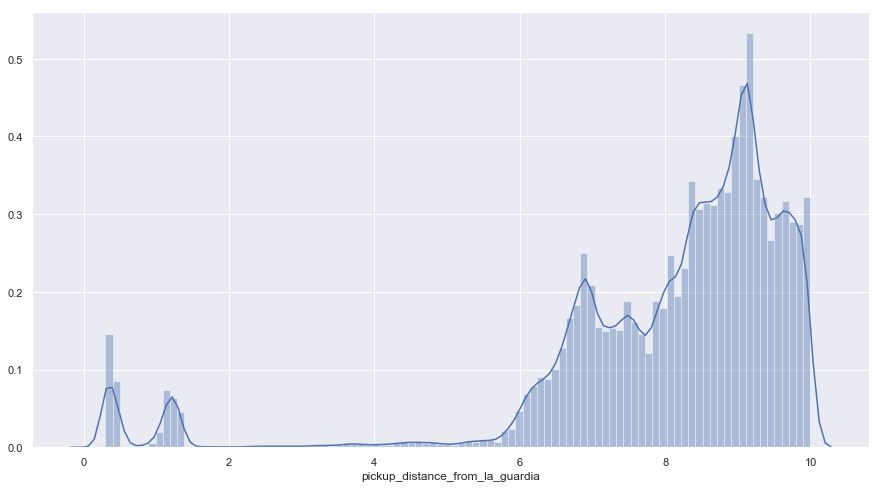

In [99]:
sns.distplot(
    dataframe[dataframe.pickup_distance_from_la_guardia < 10].pickup_distance_from_la_guardia, bins=100)

Как можно видеть, выделяются 2 пика, поэтому, сделаем 2 признака.

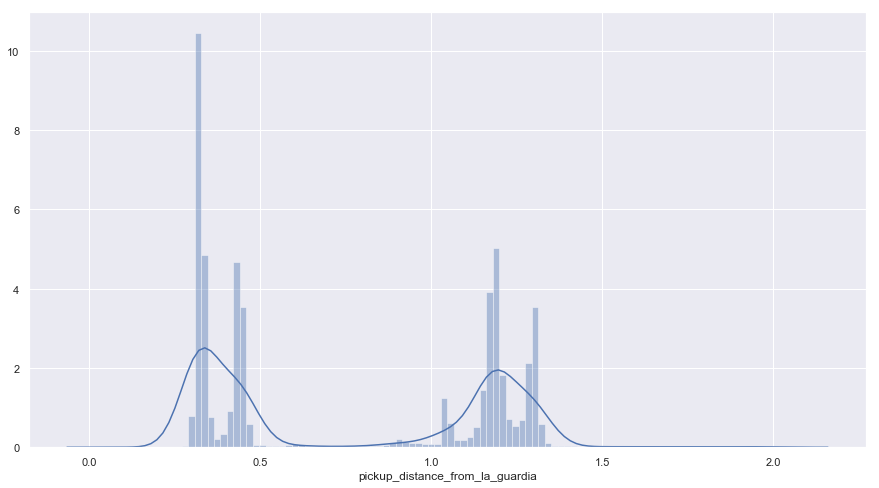

In [100]:
sns.distplot(
    dataframe[dataframe.pickup_distance_from_la_guardia < 2].pickup_distance_from_la_guardia, bins=100)

In [101]:
dataframe['pickup_from_la_guardia'] = dataframe['pickup_distance_from_la_guardia'] < 1.5

dataframe['pickup_from_la_guardia_zone1'] = dataframe['pickup_distance_from_la_guardia'] < 0.6
dataframe['pickup_from_la_guardia_zone2'] = \
        (dataframe['pickup_distance_from_la_guardia'] >= 0.6) \
        & (dataframe['pickup_distance_from_la_guardia'] < 1.5)

In [102]:
show_circles_on_map(dataframe[dataframe['pickup_from_la_guardia_zone2']].sample(100), "pickup_latitude", "pickup_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

Повторим те же шаги для dropoff и для другого аэропорта

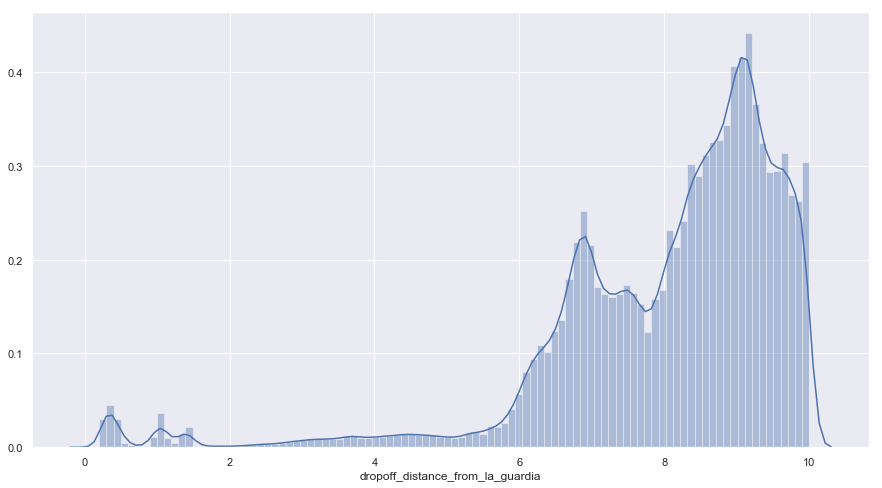

In [103]:
sns.distplot(
    dataframe[dataframe.dropoff_distance_from_la_guardia < 10].dropoff_distance_from_la_guardia, bins=100)

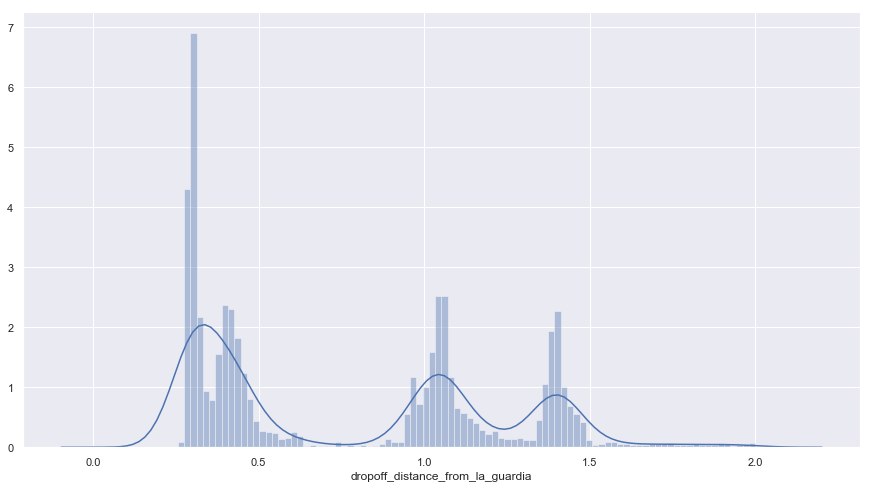

In [104]:
sns.distplot(
    dataframe[dataframe.dropoff_distance_from_la_guardia < 2].dropoff_distance_from_la_guardia, bins=100)

In [105]:
dataframe['dropoff_from_la_guardia'] = dataframe['dropoff_distance_from_la_guardia'] < 1.6

dataframe['dropoff_from_la_guardia_zone1'] = dataframe['dropoff_distance_from_la_guardia'] < 0.75
dataframe['dropoff_from_la_guardia_zone2'] = \
        (dataframe['dropoff_distance_from_la_guardia'] >= 0.75) \
        & (dataframe['dropoff_distance_from_la_guardia'] < 1.25)
dataframe['dropoff_from_la_guardia_zone3'] = \
        (dataframe['dropoff_distance_from_la_guardia'] >= 1.25) \
        & (dataframe['dropoff_distance_from_la_guardia'] < 1.6)

---

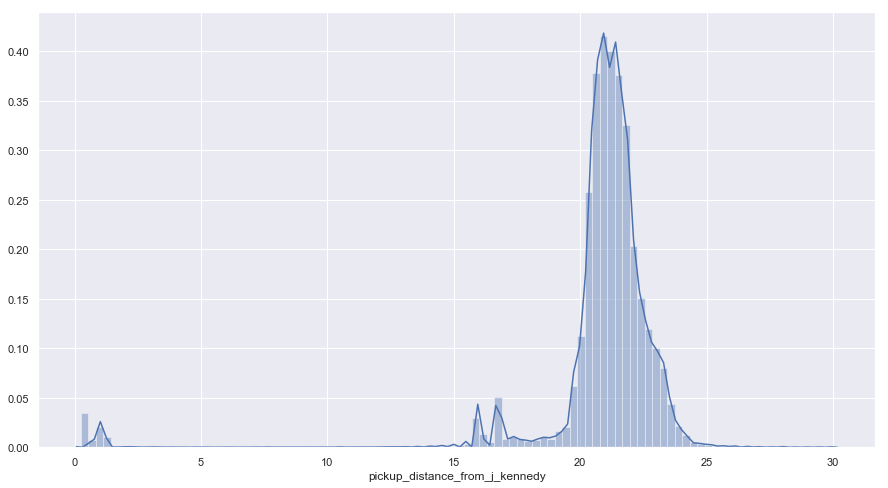

In [106]:
sns.distplot(
    dataframe[dataframe.pickup_distance_from_j_kennedy < 30].pickup_distance_from_j_kennedy, bins=100)

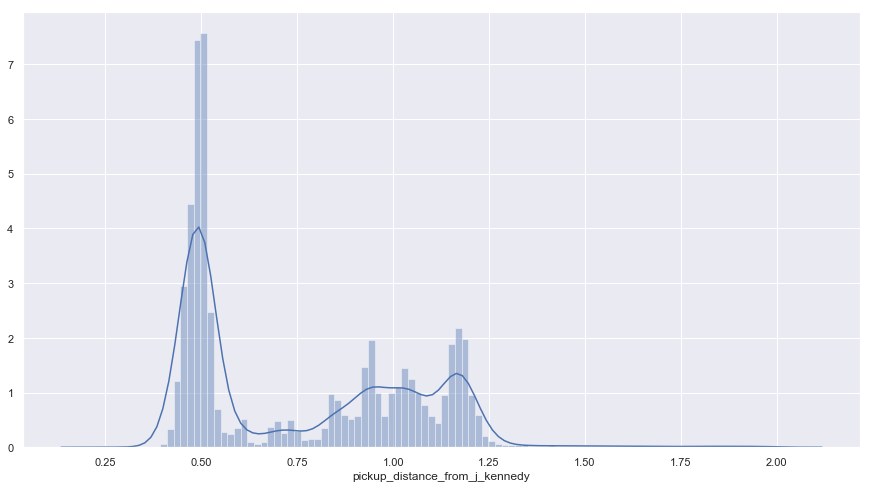

In [107]:
sns.distplot(
    dataframe[dataframe.pickup_distance_from_j_kennedy < 2].pickup_distance_from_j_kennedy, bins=100)

In [108]:
dataframe['pickup_from_j_kennedy'] = dataframe['pickup_distance_from_j_kennedy'] < 1.3

dataframe['pickup_from_j_kennedy_zone1'] = dataframe['pickup_distance_from_j_kennedy'] < 0.63
dataframe['pickup_from_j_kennedy_zone2'] = \
        (dataframe['pickup_distance_from_j_kennedy'] >= 0.63) \
        & (dataframe['pickup_distance_from_j_kennedy'] < 1.3)

---

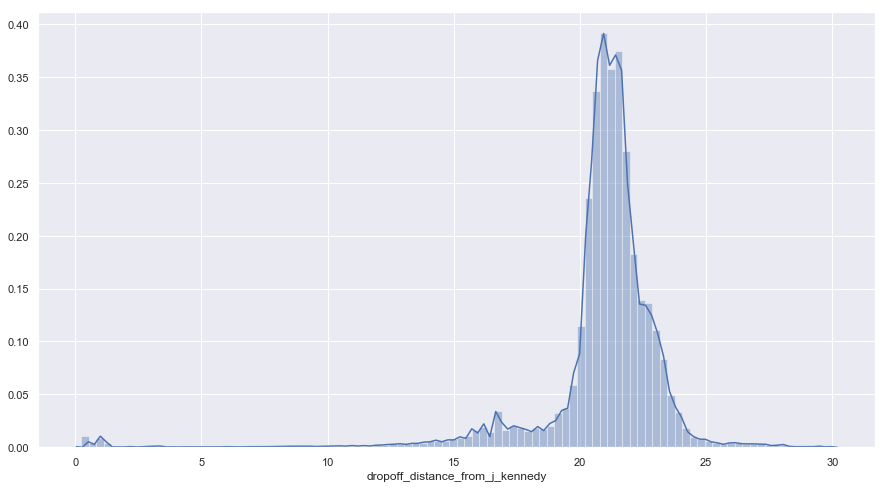

In [109]:
sns.distplot(
    dataframe[dataframe.dropoff_distance_from_j_kennedy < 30].dropoff_distance_from_j_kennedy, bins=100)

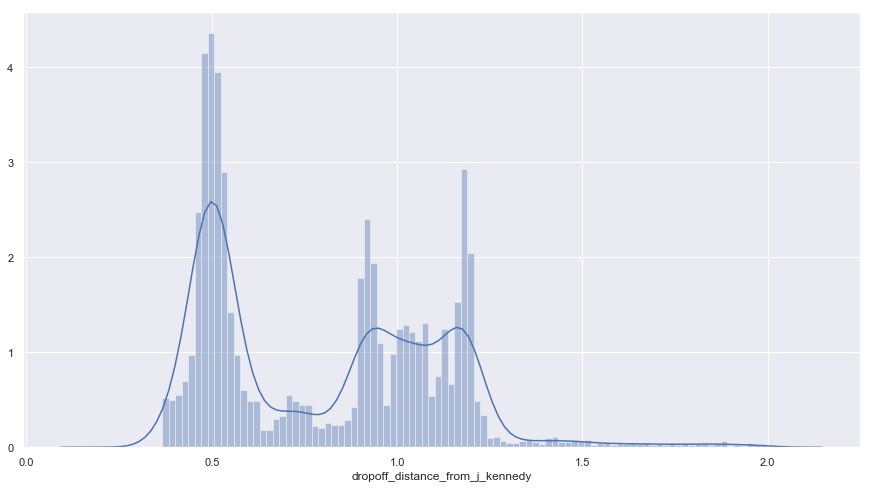

In [110]:
sns.distplot(
    dataframe[dataframe.dropoff_distance_from_j_kennedy < 2].dropoff_distance_from_j_kennedy, bins=100)

In [111]:
dataframe['dropoff_from_j_kennedy'] = dataframe['dropoff_distance_from_j_kennedy'] < 1.5

dataframe['dropoff_from_j_kennedy_zone1'] = dataframe['dropoff_distance_from_j_kennedy'] < 0.75
dataframe['dropoff_from_j_kennedy_zone2'] = \
        (dataframe['dropoff_distance_from_j_kennedy'] >= 0.75) \
        & (dataframe['dropoff_distance_from_j_kennedy'] < 1.5)

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

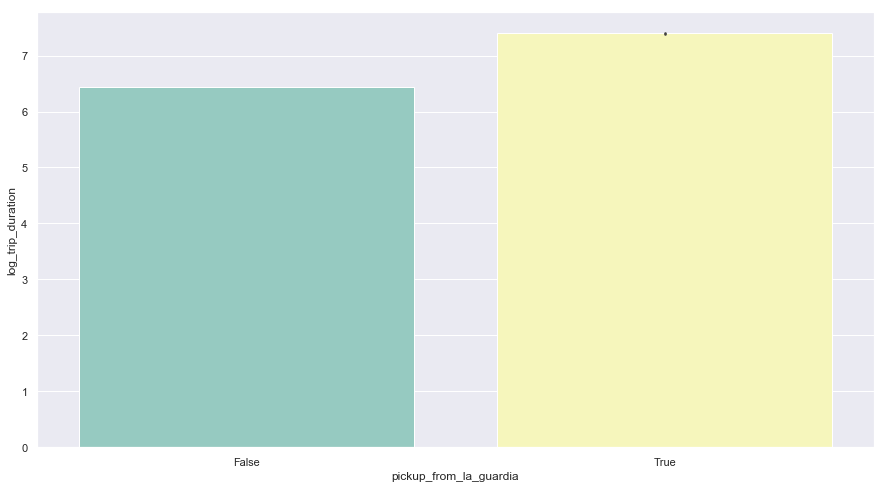

In [112]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.barplot(x='pickup_from_la_guardia', y='log_trip_duration', data=dataframe, palette="Set3")

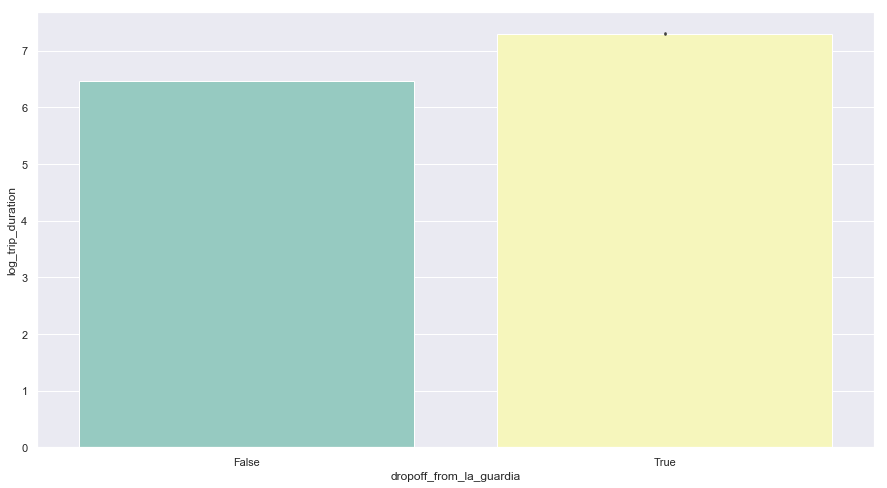

In [113]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.barplot(x='dropoff_from_la_guardia', y='log_trip_duration', data=dataframe, palette="Set3")

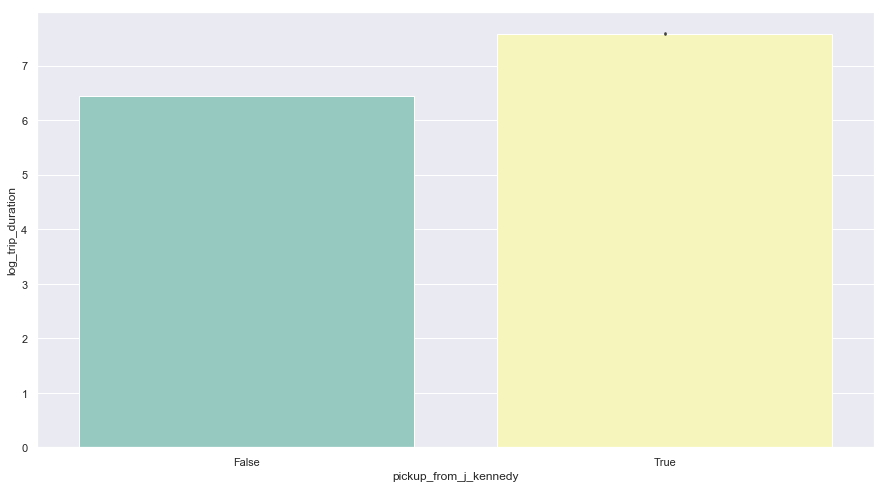

In [114]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.barplot(x='pickup_from_j_kennedy', y='log_trip_duration', data=dataframe, palette="Set3")

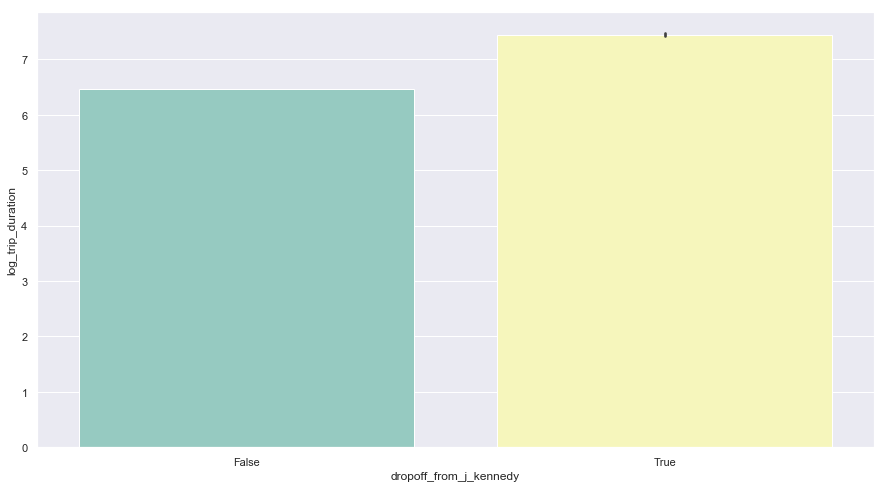

In [115]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.barplot(x='dropoff_from_j_kennedy', y='log_trip_duration', data=dataframe, palette="Set3")

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Все графики показывают, что log_trip_duration поездок из\в аэропорт имеют большую область значений, то есть они более вероятно, чем остальные поездки будут длиться дольше определенного времени, поэтому признак хорош.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

Определим граничные широты и долготы для разбиения на квадраты

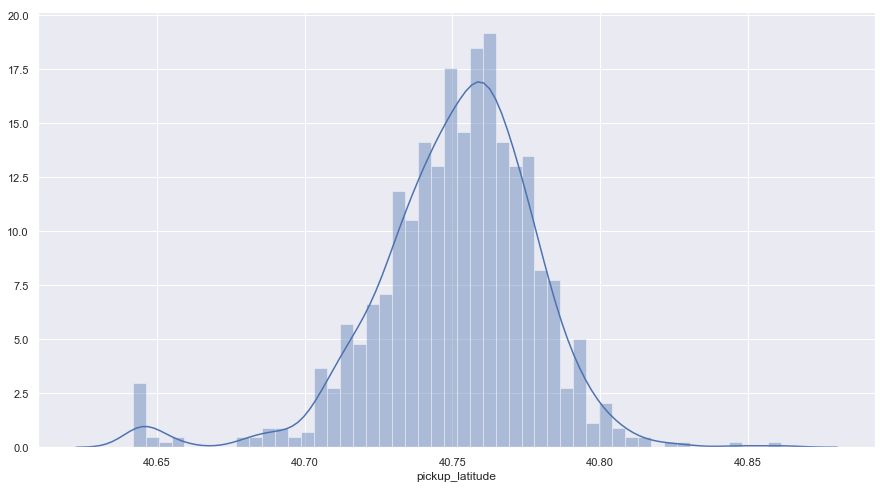

In [116]:
sns.distplot(
    dataframe.sample(1000, random_state=1)['pickup_latitude'], bins=50)

In [117]:
LAT_MIN = 40.63
LAT_MAX = 40.85

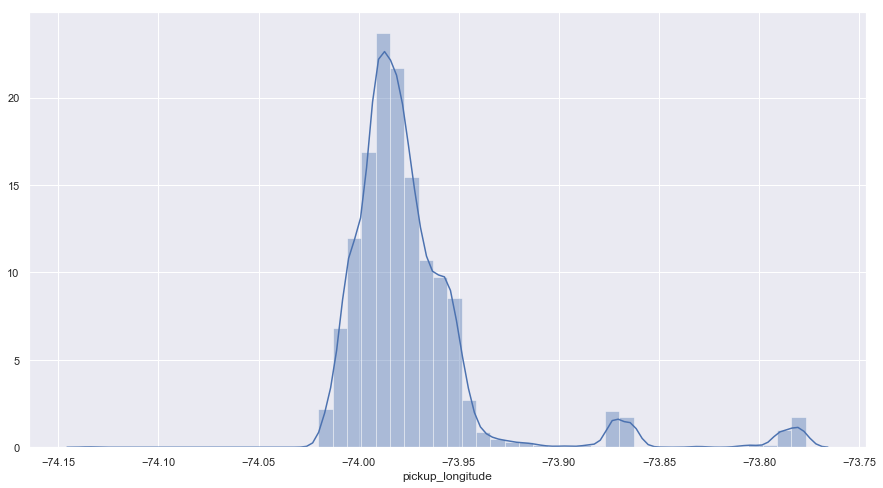

In [118]:
sns.distplot(
    dataframe.sample(5000, random_state=1)['pickup_longitude'], bins=50)

In [119]:
LON_MIN = -74.04
LON_MAX = -73.76

In [120]:
show_circles_on_map(
    dataframe[
        (dataframe['pickup_latitude'] < LAT_MAX) & (dataframe['pickup_latitude'] > LAT_MIN) &
        (dataframe['pickup_longitude'] < LON_MAX) & (dataframe['pickup_longitude'] > LON_MIN)
    ].sample(2000),
    "pickup_latitude", "pickup_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [121]:
X_MIN, X_MAX, Y_MIN, Y_MAX = LON_MIN, LON_MAX, LAT_MIN, LAT_MAX

In [122]:
from sklearn.base import BaseEstimator, TransformerMixin
import math

def get_sq_ind(x, y, delta_x, delta_y, x_count):
    sq_ind = -1
    if x >= X_MIN and x <= X_MAX and y >= Y_MIN and y <= Y_MAX:
        sq_ind = x_count * math.floor(((y - Y_MIN) / delta_y)) \
                                                + math.floor((x - X_MIN) / delta_x)
    return sq_ind
    
def row_modifier(pickup_x, pickup_y, dropoff_x, dropoff_y, delta_x, delta_y, x_count):
    pickup_sq_ind = get_sq_ind(pickup_x, pickup_y, delta_x, delta_y, x_count)
    dropoff_sq_ind = get_sq_ind(dropoff_x, dropoff_y, delta_x, delta_y, x_count)
    return pickup_sq_ind, dropoff_sq_ind, pickup_sq_ind == dropoff_sq_ind and pickup_sq_ind != -1

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, x_count=3, y_count=4):
        self.x_count = x_count
        self.y_count = y_count
        self._pickup_lat_col = 'pickup_latitude'
        self._pickup_lon_col = 'pickup_longitude'
        self._dropoff_lat_col = 'dropoff_latitude'
        self._dropoff_lon_col = 'dropoff_longitude'
        self._delta_x = (X_MAX - X_MIN) / self.x_count
        self._delta_y = (Y_MAX - Y_MIN) / self.y_count

    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        return np.transpose(np.vectorize(row_modifier)(
            X[self._pickup_lon_col], X[self._pickup_lat_col],
            X[self._dropoff_lon_col], X[self._dropoff_lat_col], self._delta_x, self._delta_y, self.x_count))

Проверим трансформер на адекватность.

In [123]:
from copy import deepcopy

t_test = MapGridTransformer(6, 8)
res_test = t_test.transform(dataframe)
test_df = deepcopy(dataframe)
test_df['pickup_sq'] = np.transpose(res_test)[0]
test_df['dropoff_sq'] = np.transpose(res_test)[1]
test_df['same_sq'] = np.transpose(res_test)[2]

In [124]:
show_circles_on_map(
    test_df[test_df['pickup_sq'] == -1].sample(1000),
    "pickup_latitude", "pickup_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [125]:
show_circles_on_map(
    test_df[test_df['dropoff_sq'] == 6].sample(2000),
    "dropoff_latitude", "dropoff_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

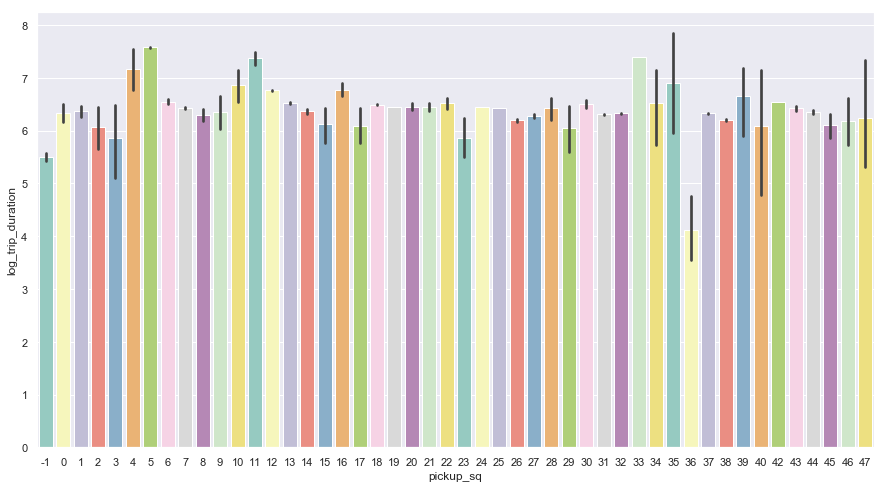

In [126]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.barplot(x='pickup_sq', y='log_trip_duration', data=test_df, palette="Set3")

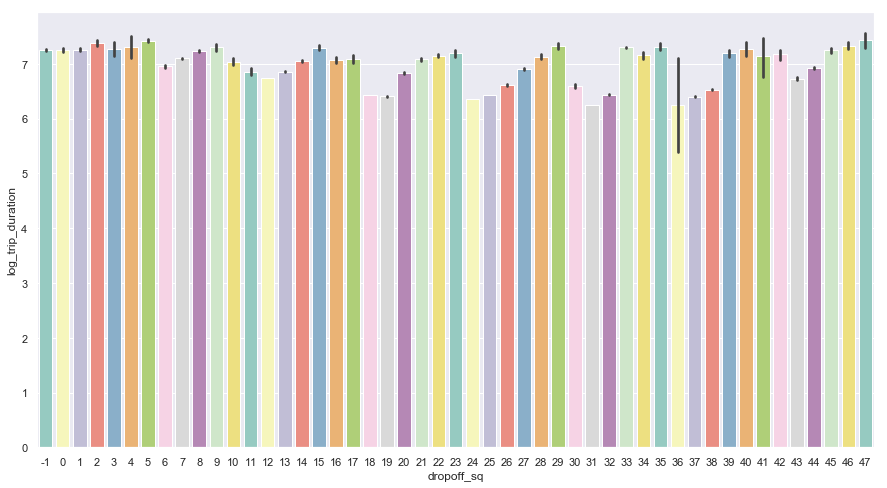

In [127]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.barplot(x='dropoff_sq', y='log_trip_duration', data=test_df, palette="Set3")

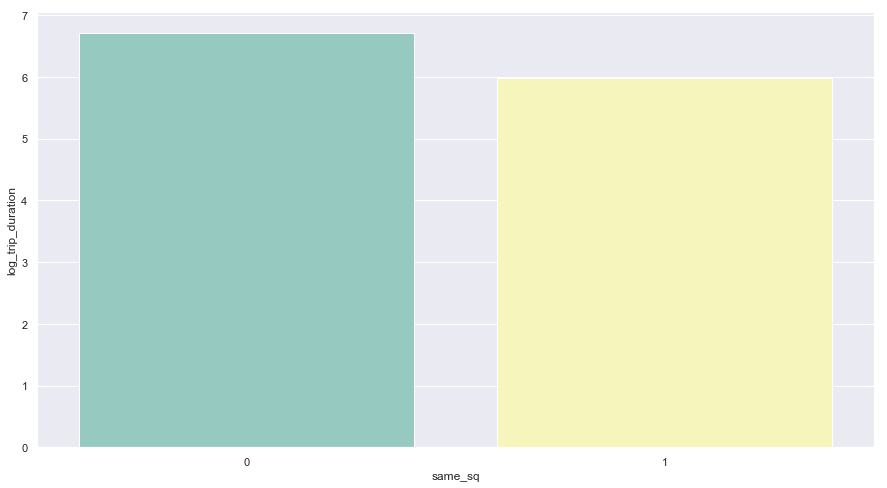

In [128]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.barplot(x='same_sq', y='log_trip_duration', data=test_df, palette="Set3")

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, численные признаки отмасштабируйте.

In [129]:
y = dataframe['log_trip_duration']
X = dataframe.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [130]:
categorical_features = ['weekday', 'month', 'dayofyear', 'hour']
numeric_features = [
    'is_anomalous_1', 'is_anomalous_2', 'is_anomalous_3', 'is_anomalous_4', 'empty_roads', 'busy_roads',
    'pickup_from_j_kennedy', 'dropoff_from_j_kennedy', 'pickup_from_la_guardia', 'dropoff_from_la_guardia',
    'log_haversine'
]
grid_features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
column_transformer = ColumnTransformer([
    ('grid', MapGridTransformer(x_count=10, y_count=14), grid_features),
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('grid_and_ohe_and_scaling', column_transformer.set_params(grid__x_count=10, grid__y_count=14)),
    ('regression', Ridge())
])

In [131]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


Test RMSE = 0.4864


Трансформер сделали, но для дальнейшего удобства все же хочется сохранить значения квадратов в сам датасет, чтобы было проще экспериментировать

In [216]:
X_COUNT = 12
Y_COUNT = 16
transformer = MapGridTransformer(12, 16)
transformed = transformer.transform(dataframe)
dataframe['pickup_sq'] = np.transpose(transformed)[0]
dataframe['dropoff_sq'] = np.transpose(transformed)[1]
dataframe['same_sq'] = np.transpose(transformed)[2]

In [168]:
y = dataframe['log_trip_duration']
X = dataframe.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [169]:
categorical_features = ['weekday', 'month', 'dayofyear', 'hour', 'pickup_sq', 'dropoff_sq']
numeric_features = [
    'is_anomalous_1', 'is_anomalous_2', 'is_anomalous_3', 'is_anomalous_4', 'empty_roads', 'busy_roads',
    'pickup_from_j_kennedy', 'dropoff_from_j_kennedy', 'pickup_from_la_guardia', 'dropoff_from_la_guardia',
    'log_haversine', 'same_sq'
]
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('and_ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

In [170]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


Test RMSE = 0.4673


In [171]:
dataframe.to_csv('my_dataframe.csv')

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [174]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('vendor_id: count unique: %d, values: %s' % (
    dataframe['vendor_id'].nunique(), np.sort(dataframe['vendor_id'].unique())))

print('passenger_count: count unique: %d, values: %s' % (
    dataframe['passenger_count'].nunique(), np.sort(dataframe['passenger_count'].unique())))

print('store_and_fwd_flag: count unique: %d, values: %s' % (
    dataframe['store_and_fwd_flag'].nunique(), np.sort(dataframe['store_and_fwd_flag'].unique())))

vendor_id: count unique: 2, values: [0 1]
passenger_count: count unique: 10, values: [0 1 2 3 4 5 6 7 8 9]
store_and_fwd_flag: count unique: 2, values: [0 1]


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

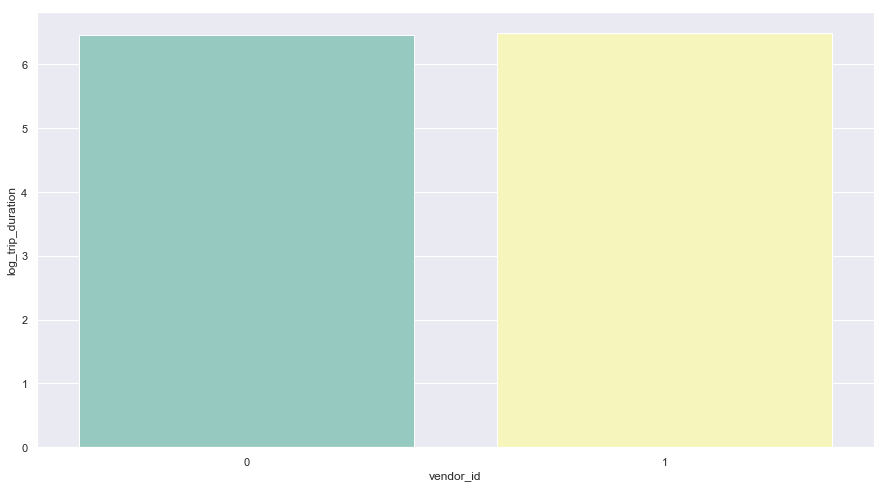

In [175]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.barplot(x='vendor_id', y='log_trip_duration', data=dataframe, palette="Set3")

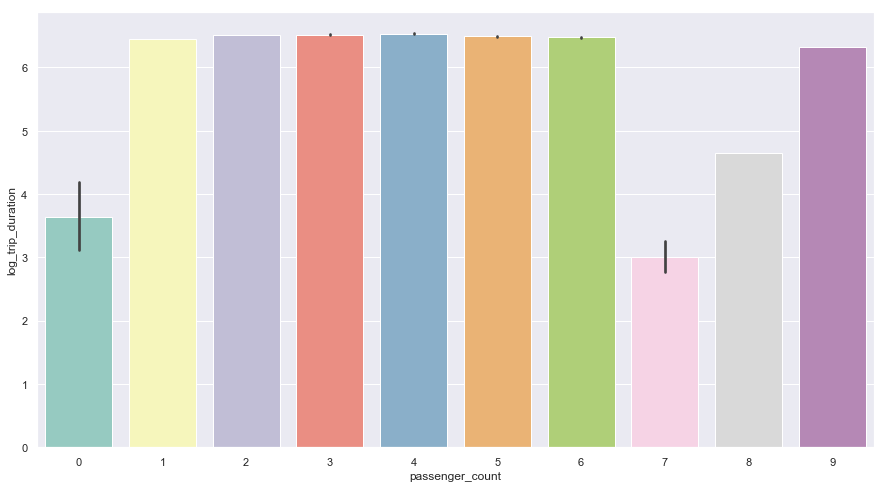

In [176]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.barplot(x='passenger_count', y='log_trip_duration', data=dataframe, palette="Set3")

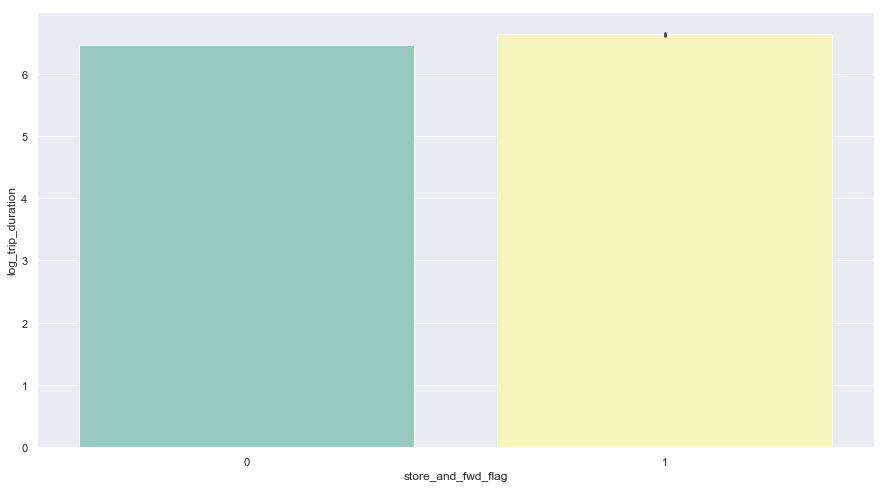

In [177]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.barplot(x='store_and_fwd_flag', y='log_trip_duration', data=dataframe, palette="Set3")

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
dataframe['vendor_id'] = dataframe['vendor_id'] - 1

In [138]:
dataframe['store_and_fwd_flag'] = dataframe['store_and_fwd_flag'].astype(int)

In [178]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('vendor_id: count unique: %d, values: %s' % (
    dataframe['vendor_id'].nunique(), np.sort(dataframe['vendor_id'].unique())))

print('passenger_count: count unique: %d, values: %s' % (
    dataframe['passenger_count'].nunique(), np.sort(dataframe['passenger_count'].unique())))

print('store_and_fwd_flag: count unique: %d, values: %s' % (
    dataframe['store_and_fwd_flag'].nunique(), np.sort(dataframe['store_and_fwd_flag'].unique())))

vendor_id: count unique: 2, values: [0 1]
passenger_count: count unique: 10, values: [0 1 2 3 4 5 6 7 8 9]
store_and_fwd_flag: count unique: 2, values: [0 1]


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

нет, только passenger_count может пригодиться, так как наблюдаются различия для passenger_count in (0, 7, 8)

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [179]:
y = dataframe['log_trip_duration']
X = dataframe.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [180]:
categorical_features = ['weekday', 'month', 'dayofyear', 'hour', 'pickup_sq', 'dropoff_sq', 'passenger_count']
numeric_features = [
    'is_anomalous_1', 'is_anomalous_2', 'is_anomalous_3', 'is_anomalous_4', 'empty_roads', 'busy_roads',
    'pickup_from_j_kennedy', 'dropoff_from_j_kennedy', 'pickup_from_la_guardia', 'dropoff_from_la_guardia',
    'log_haversine', 'same_sq', 'store_and_fwd_flag', 'vendor_id'
]
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('and_ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

In [181]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


Test RMSE = 0.4670


In [182]:
dataframe.to_csv('my_dataframe-2.csv')

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

In [183]:
def remove_edges(dataframe, trip_dur_min, haversine_max, predict_diff_max):
    dataframe = dataframe[dataframe.trip_duration >= trip_dur_min]
    dataframe = dataframe[dataframe.haversine <= haversine_max]
    dataframe = dataframe[dataframe.haversine < 100]
    dataframe = dataframe[abs(dataframe.log_trip_duration - model.predict(dataframe)) < predict_diff_max]

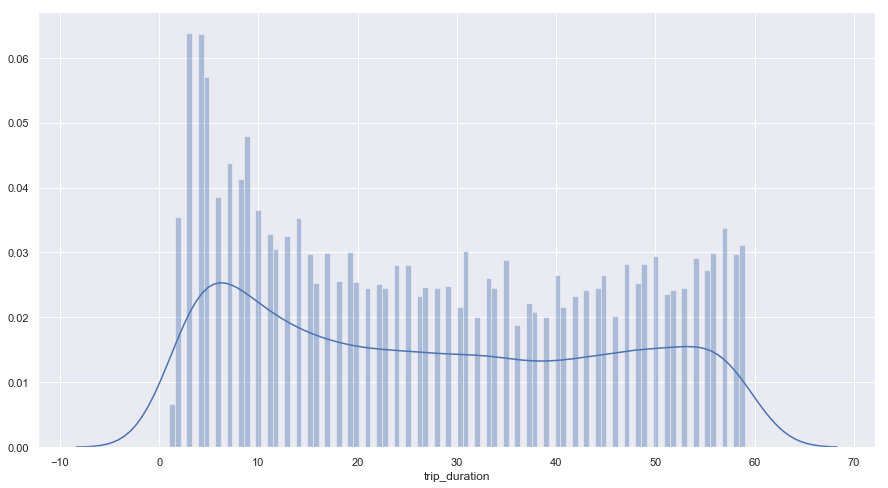

In [187]:
sns.distplot(
    dataframe[(dataframe.trip_duration < 60)].trip_duration, bins=100)

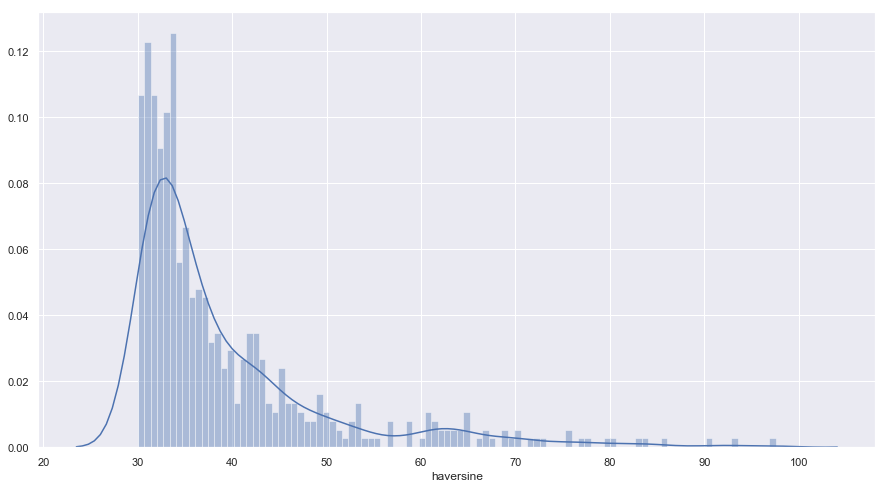

In [185]:
sns.distplot(
    dataframe[
        (dataframe.haversine < 100) & (dataframe.haversine > 30)].haversine, bins=100)

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


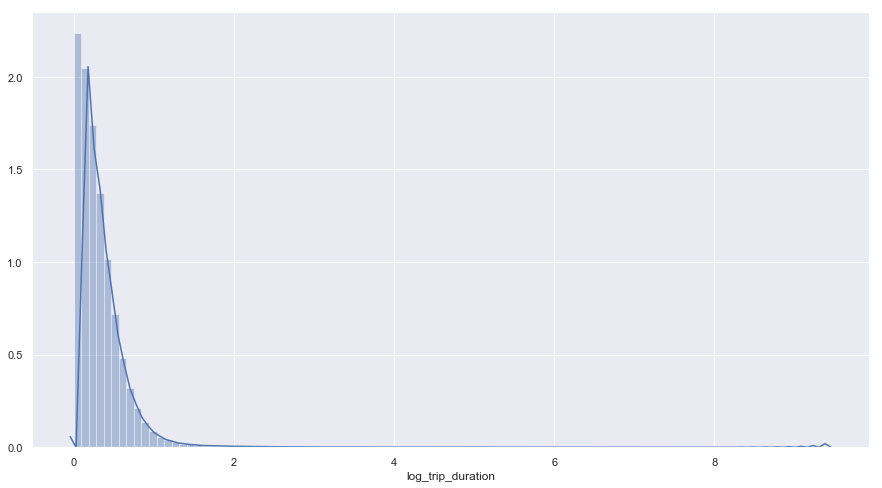

In [188]:
sns.distplot(
   abs(dataframe['log_trip_duration'] - model.predict(dataframe)), bins=100)

In [243]:
dataframe = pd.read_csv('my_dataframe-2.csv')
train, test = train_test_split(dataframe, test_size=0.25, random_state=10)

In [190]:
#remove_edges(train, 10, 500, 4)

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [191]:
model = pipeline.fit(train, train['log_trip_duration'])
y_pred = model.predict(test)
print("Test RMSE = %.4f" % rmse(test['log_trip_duration'], y_pred))

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


Test RMSE = 0.4675


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

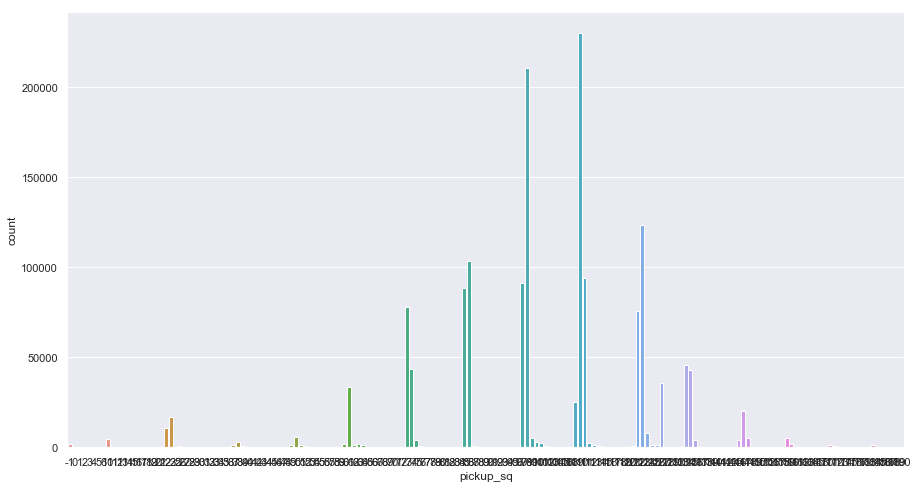

In [239]:
sns.countplot(x='pickup_sq', data=dataframe)

In [261]:
stats = dataframe['pickup_sq'].value_counts().to_frame().reset_index()
stats.columns = ['pickup_sq', 'count']
stats = stats[stats['count'] > 1000]
stats = stats.sort_values(by=['pickup_sq'])
good_squares = set(stats.pickup_sq.tolist())

row_modifier = lambda x: x if x in good_squares else -2

#dataframe['pickup_sq'] = np.vectorize(row_modifier)(dataframe['pickup_sq'])
#dataframe['dropoff_sq'] = np.vectorize(row_modifier)(dataframe['dropoff_sq'])

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [244]:
y = dataframe['log_trip_duration']
X = dataframe.drop(columns=['log_trip_duration'])
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [245]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


Test RMSE = 0.4670


У меня получается, что качество модели падает после обработок такого типа.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [254]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
pipeline = Pipeline(steps=[
    ('grid_and_ohe_and_scaling', column_transformer),
])

p = pipeline.transform(X)

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [262]:
print('before: ', len(['weekday', 'month', 'dayofyear', 'hour', 'pickup_sq', 'dropoff_sq', 'passenger_count']))
print('after: ', p.shape[1])

before:  7
after:  596


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Стало ли лучше?

In [252]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
pipeline = Pipeline(steps=[
    ('grid_and_ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

In [253]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


Test RMSE = 0.7943


нет :)

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерьте качество полученной модели.

In [264]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring=rmse_scorer, cv=10)
searcher.fit(pipeline.transform(X_train), y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


Для каждого перебранного `alpha` посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Полезный, потому что так можно вычислить "типичные" поездки.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
dataframe['pair'] = [dataframe['pickup_sq', 'dropoff_sq']]
stats = dataframe['pair'].value_counts()[:100].to_frame().reset_index()
stats.columns = ['pair', 'count']
stats = stats[stats['count'] > 1000]
stats = stats.sort_values(by=['pair'])
good_pairs = set(stats.pickup_sq.tolist())

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ